In [4]:
# Student Marks Prediction with Special Attention

#This notebook trains a regression model to predict student marks and identify students who require special attention based on their predicted scores.

#We use a Linear Regression model for simplicity. Remarks are added based on the predicted marks.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the student dataset (make sure student_data.csv is in the same directory)
df = pd.read_csv("student_data.csv")
df.head(100)

,Hours_Studied,Attendance,Previous_Score,Sleep_Hours,Participation,Final_Marks
0,3.3,41.9,68.2,4.3,1,58.1
1,7.6,78.2,26.3,6.7,1,66.0
2,6.0,58.9,32.1,6.7,1,60.0
3,5.0,70.5,87.4,7.2,4,64.3
4,1.7,94.5,65.5,7.6,1,58.7
...,...,...,...,...,...,...
95,4.2,61.0,59.2,8.7,5,81.5
96,4.4,83.6,77.7,8.3,2,54.9
97,3.7,93.8,36.2,6.1,4,76.9
98,0.7,93.2,66.7,7.8,5,70.9


In [24]:
# Features and target
X = df.drop("Final_Marks", axis=1)
y = df["Final_Marks"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 596.19


In [37]:
# Prepare result dataframe
results_df = X_test.copy()
results_df["Actual_Marks"] = y_test.values
results_df["Predicted_Marks"] = y_pred

# Define remark logic
def get_remark(score):
    if score < 40:
        return "Requires Special Attention"
    elif score < 60:
        return "Needs Improvement"
    elif score < 75:
        return "Satisfactory"
    elif score < 90:
        return "Good"
    else:
        return "Excellent"

# Apply remark function
results_df["Remark"] = results_df["Predicted_Marks"].apply(get_remark)
results_df.head(100)

,Hours_Studied,Attendance,Previous_Score,Sleep_Hours,Participation,Actual_Marks,Predicted_Marks,Remark
83,1.0,92.6,27.0,8.4,4,27.2,53.879017,Needs Improvement
53,7.2,69.4,43.8,4.8,3,77.6,79.008386,Good
70,6.3,80.7,80.7,4.5,5,100.0,81.901267,Good
45,5.5,42.2,89.6,7.1,2,40.7,71.003698,Satisfactory
44,2.4,57.1,21.2,6.0,2,64.7,55.356397,Needs Improvement
39,3.8,98.3,33.3,4.5,3,83.0,60.619286,Satisfactory
22,2.7,59.1,27.0,7.3,3,81.5,60.856210,Satisfactory
80,7.0,60.5,86.8,4.6,4,100.0,83.209985,Good
10,0.7,57.4,61.2,6.2,4,85.0,56.081231,Needs Improvement
0,3.3,41.9,68.2,4.3,1,58.1,56.578874,Needs Improvement


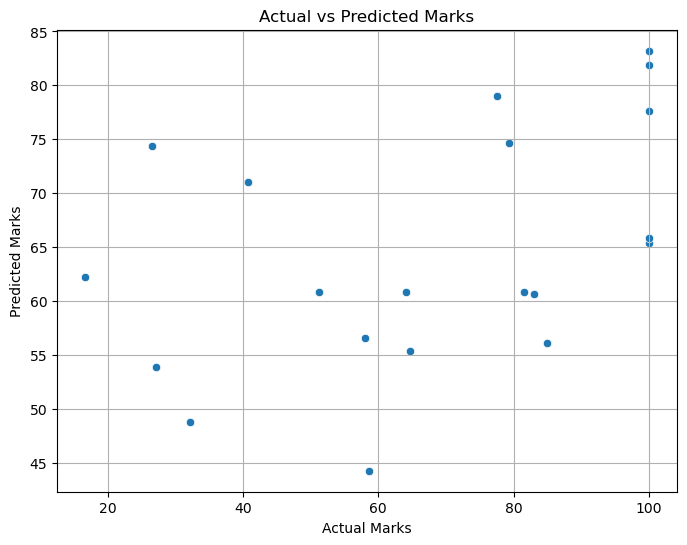

In [30]:
# Visualizing Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks")
plt.grid(True)
plt.show()

In [35]:
# Save prediction results to a new CSV
results_df.to_csv("student_model_predictions.csv", index=False)
print("Results saved to student_model_predictions.csv")

Results saved to student_model_predictions.csv
